# A Plot of $H_R$ vs. $H_0$

Yates et al. make the statement that they can construct a new acidity function, $H_S$, for ester protonation by determing a proportionality factor w.r.t. $H_0$. As evidence that the factor will hold across a range of $H_0$, they plot several acidity functions against $H_0$. Since we have the data for $H_R$ and $H_0$, let us plot this relationship for ourselves.

In [1]:
##############################################################
### Set up libraries and global variables
##############################################################

H0_Data_File_Name = "02_H0_H2SO4_Tickle_1970.csv"

HR_Data_File_Name = "04_Deno_1955_HR_Values.csv"
#HR_Data_File_Name = "04_Cook_1975_HR_Values.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import linregress

from statsmodels.nonparametric.smoothers_lowess import lowess     # A function for interpolating a plot using the locally weighed scatterplot smoothing method. Returns smoothed x,y points
from scipy.interpolate import CubicSpline                         # A function for interpolating a plot using the cubic spline method. Returns an interpolation function.
from scipy.interpolate import interp1d                            # A function for interpolating a plot using the connect-the-dots method. Returns an interpolation function.
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

from matplotlib.patches import PathPatch
from matplotlib.path import Path


#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_styles = "./styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

molwtH2SO4 = 98.08
molwtH20 = 18.0
densityH2SO4 = 1.83
densityH2O = 1.000

### interpolation = interp1d(x1, y1, kind='linear')
### interpolation = CubicSpline(x1, y1)
### interpolation = scipy.interpolate.make_smoothing_spline(x1, y1, w=None, lam=0.03)



In [2]:
##############################################################
### Import the data and perform calculations
##############################################################

Filename = github_location + H0_Data_File_Name

dfH0 = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

Filename = github_location + HR_Data_File_Name

dfHR = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 


#display(dfH0.head()); display(dfH0.tail())
#display(dfHR.head()); display(dfHR.tail())

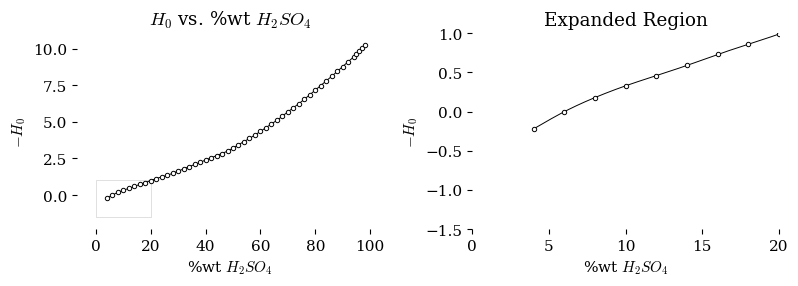

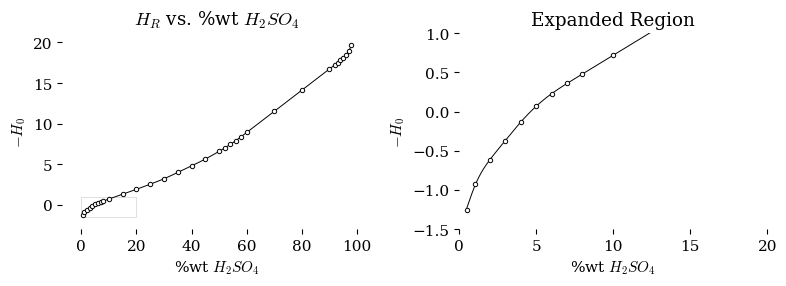

In [3]:
###################################################
### Get the data
###################################################

x = dfH0["%H2SO4"]
y = -dfH0["H0"]

xR = dfHR["%H2SO4"]
yR = -dfHR["HR"]

###################################################
### Interpolate the data
###################################################

### Using a smoothing interpolation function that returns a Bspline function

interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                      w=None,    ### A list of weights for each point (default = None)
                                      lam=0.03)  ### A factor for the degree of smoothing. Change this to change the smoothness.
step = 0.01
x_smooth = np.arange(np.min(x), np.max(x)+step, step)
y_smooth = interpolation(x_smooth)

interpolationHR = make_smoothing_spline(xR, yR,      ### The x and y data
                                       w=None,    ### A list of weights for each point (default = None)
                                       lam=0.03)  ### A factor for the degree of smoothing. Change this to change the smoothness.
step = 0.01
xR_smooth = np.arange(np.min(xR), np.max(xR)+step, step)
yR_smooth = interpolationHR(xR_smooth)


###################################################
### Set zoom range for second plot
###################################################

#zoom_xlim=[80,100]; zoom_ylim=[7,11]
#zoom_xlim=[0,20]; zoom_ylim=[None, None]
zoom_xlim=[0,20]; zoom_ylim=[-1.5, 1]
#zoom_xlim=[80,100]; zoom_ylim=[15, 21]




###################################################
### Set up labels for plots
###################################################

x_label = r"%wt ${H_2SO_4}$"
y_label = r"$-H_0$"

Title0 = "$H_0$ vs. %wt $H_2SO_4$"
Title0HR = "$H_R$ vs. %wt $H_2SO_4$"

Title1 = "Expanded Region"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))  

###########################
### Set up rectangle for box patch
###########################

vertices = []
codes = []

codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices = [(zoom_xlim[0], zoom_ylim[0]), 
            (zoom_xlim[0], zoom_ylim[1]), 
            (zoom_xlim[1], zoom_ylim[1]), 
            (zoom_xlim[1], zoom_ylim[0]), 
            (0, 0)]

path = Path(vertices, codes)
pathpatch0 = PathPatch(path, edgecolor='lightgray', facecolor='white', linewidth=0.5, zorder = 0)
pathpatch0HR = PathPatch(path, edgecolor='lightgray', facecolor='white', linewidth=0.5, zorder = 0)

###################################################
###################################################

###################################################
### Make the first plot (plot 0)
###################################################

ax[0].set(
          title = Title0,       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
       )
ax[0].margins(x=.07, y=.07, tight=True)

# ax[0].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray", zorder = 0)   # A vertical line highlight

if True:
       ax[0].scatter(x, y, 
                    marker = "o", 
                    s = 10, 
                    color = "white", 
                    edgecolors = "black", 
                    linewidths=0.7, 
                    zorder = 2)

ax[0].add_patch(pathpatch0)   # add the box to highlight the zoom area

#ax[0].plot(x, y, "-", color = "black", linewidth=0.7, zorder = 1)
ax[0].plot(x_smooth, y_smooth, "-", color = "black", linewidth=0.7, zorder = 1)


###################################################
### Make the second plot (plot 1)
###################################################

ax[1].set(
          title = Title1,       
          ylabel=y_label, 
          xlabel=x_label,                
          xlim=zoom_xlim,      ### Set axis limits to zoom in         
          ylim=zoom_ylim
       )
ax[1].margins(x=.07, y=.07, tight=True)

# ax[1].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray", zorder = 0)   # A vertical line highlight

ax[1].scatter(x, y, 
              marker = "o", 
              s = 10, 
              color = "white", 
              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 2)


#ax[1].plot(x, y, "-", color = "black", linewidth=0.7, zorder = 1)
ax[1].plot(x_smooth, y_smooth, "-", color = "black", linewidth=0.7, zorder = 1)

plt.show()


#############################################################
#############################################################
#############################################################

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))  

ax[0].set(
          title = Title0HR,       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
       )
ax[0].margins(x=.07, y=.07, tight=True)

if True:
       ax[0].scatter(xR, yR, 
                    marker = "o", 
                    s = 10, 
                    color = "white", 
                    edgecolors = "black", 
                    linewidths=0.7, 
                    zorder = 2)

ax[0].add_patch(pathpatch0HR)   # add the box to highlight the zoom area

ax[0].plot(xR_smooth, yR_smooth, "-", color = "black", linewidth=0.7, zorder = 1)


###################################################
### Make the second plot (plot 1)
###################################################

ax[1].set(
          title = Title1,       
          ylabel=y_label, 
          xlabel=x_label,                
          xlim=zoom_xlim,      ### Set axis limits to zoom in         
          ylim=zoom_ylim
       )
ax[1].margins(x=.07, y=.07, tight=True)

ax[1].scatter(xR, yR, 
              marker = "o", 
              s = 10, 
              color = "white", 
              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 2)

ax[1].plot(xR_smooth, yR_smooth, "-", color = "black", linewidth=0.7, zorder = 1)

plt.show()


In [4]:
###################################################
### Create Interpolation Function for H0 from %H2SO4
###################################################

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForH0inH2SO4byPercentWt():
    Data_File_Name = "02_H0_H2SO4_Tickle_1970.csv"

    import pandas as pd
    import numpy as np
    from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.
    
    #github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
    github_location = "./data/"
        
    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    
    x = df["%H2SO4"]
    y = df["H0"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0.1)  ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)

###################################################
### call the function to create an interpolator for activity H2O in H2SO4
###################################################

interpolator = MakeInterpolationFunctionForH0inH2SO4byPercentWt()

###################################################
### An example of using the inerpolation function that you just created
###################################################

percentH2SO4 = 100

H0Value = interpolator(percentH2SO4)

print(f"The H0 in {percentH2SO4}% H2SO4 is {H0Value:0.3f}")

###################################################
### Interpolator Functions
###################################################





The H0 in 100% H2SO4 is -10.616


In [5]:
###################################################
### Create Interpolation Function for HR from %H2SO4
###################################################

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForHRinH2SO4byPercentWt():
    Data_File_Name = "04_Deno_1955_HR_Values.csv"

    import pandas as pd
    import numpy as np
    from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.
    
    #github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
    github_location = "./data/"
        
    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    
    x = df["%H2SO4"]
    y = df["HR"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0.1)  ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)

###################################################
### call the function to create an interpolator for activity H2O in H2SO4
###################################################

interpolator = MakeInterpolationFunctionForHRinH2SO4byPercentWt()

###################################################
### An example of using the inerpolation function that you just created
###################################################

percentH2SO4 = 100

H0Value = interpolator(percentH2SO4)

print(f"The HR in {percentH2SO4}% H2SO4 is {H0Value:0.3f}")

The HR in 100% H2SO4 is -20.752


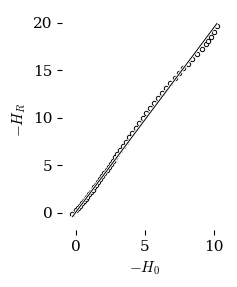

In [6]:
##################################################
### Apply interpolation function to get HR at the same concentrations as were used in the H0 data
##################################################

dfH0HR = dfH0.copy()
interpolator = MakeInterpolationFunctionForHRinH2SO4byPercentWt()
dfH0HR["HR"] = interpolator(dfH0HR["%H2SO4"])

x = -dfH0HR["H0"]
y = -dfH0HR["HR"]


###################################################
### Set up labels for plots
###################################################

x_label = "$-H_0$"
y_label = "$-H_R$"

Title = "$H_R$ vs. $H_0$"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5,3)) 

###################################################
### Make the plot
###################################################

ax.set(
#          title = Title,       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-0.1,7.6],                  
#          ylim=[-0.1,15]
       )
ax.margins(x=.07, y=.07, tight=True)

if True:
       ax.scatter(x, y, 
                    marker = "o", 
                    s = 10, 
                    color = "white", 
                    edgecolors = "black", 
                    linewidths=0.7, 
                    zorder = 2)


#ax.plot(x, y, "-", color = "black", linewidth=0.7, zorder = 1)
#ax.plot(x_smooth, y_smooth, "-", color = "black", linewidth=0.7, zorder = 1)

###################################################
### Linear regression
###################################################


def func(x, slope):
       y = x*slope
       return(y)

popt, pcov = curve_fit(func, x, y)
slope = popt[0]
y1 = x * slope


#fit = linregress(x,y)
#y1 = x*fit.slope + fit.intercept
ax.plot(x, y1, "-", color = "white", linewidth=2, zorder = 2)
ax.plot(x, y1, "-", color = "black", linewidth=0.7, zorder = 2)


plt.savefig("plots/01_F5_H0HrCorrelation.pdf")
plt.show()